In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("goldstock.csv")
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [4]:
df.shape

(2511, 7)

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.describe()

,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,298.824811,97600.769382,299.118187,301.262244,296.417703
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


In [8]:
df.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [10]:
# set the date column as the index
df = df.set_index("Date")

df = df.sort_index()


In [1]:
pwd

'C:\\Users\\ushah'

In [11]:
df.head()

,Close,Volume,Open,High,Low
Date,,,,,
2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5
2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8
2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0


In [12]:

count = (df['Close'] == 0).sum()
print('Count of zeros in feature Close : ', count)


Count of zeros in feature Close :  0


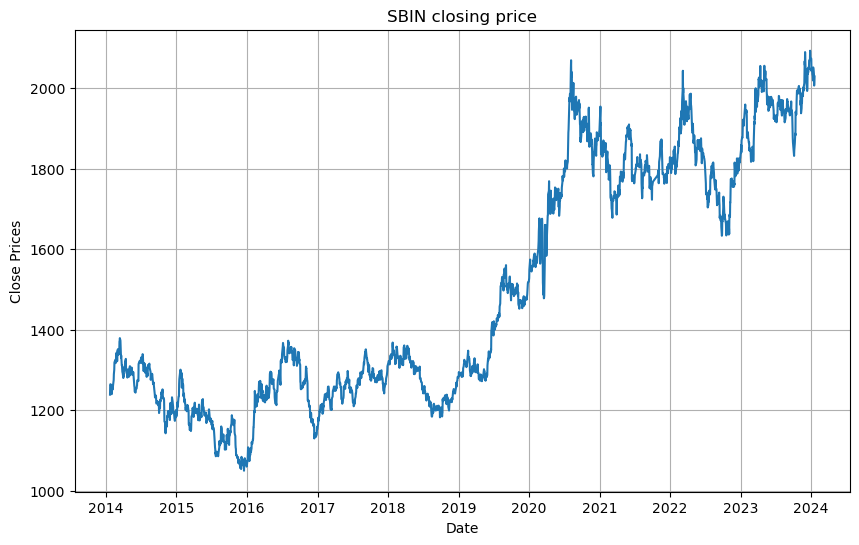

In [13]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('SBIN closing price')
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
     
    rolmean=timeseries.rolling(window=12).mean()

    rolstd=timeseries.rolling(window=12).std()
    
    plt_1 = plt.figure(figsize=(15, 3))
   
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

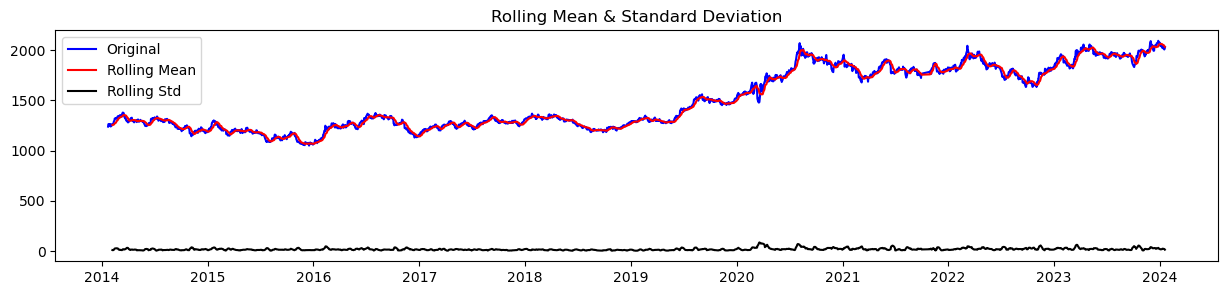

Results of Dickey-Fuller Test:
Test Statistic                   -0.641367
p-value                           0.861358
#Lags Used                        1.000000
Number of Observations Used    2509.000000
Critical Value (1%)              -3.432959
Critical Value (5%)              -2.862693
Critical Value (10%)             -2.567384
dtype: float64


In [21]:
ts=df['Close']
test_stationarity(ts)

In [83]:
# check if all list values are positive
print(all([val > 0 for val in ts_log]))
print(all([val > 0 for val in df['Volume']]))
print(all([val > 0 for val in df['Open']]))
print(all([val > 0 for val in df['High']]))
print(all([val > 0 for val in df['Low']]))

True
True
True
True
True


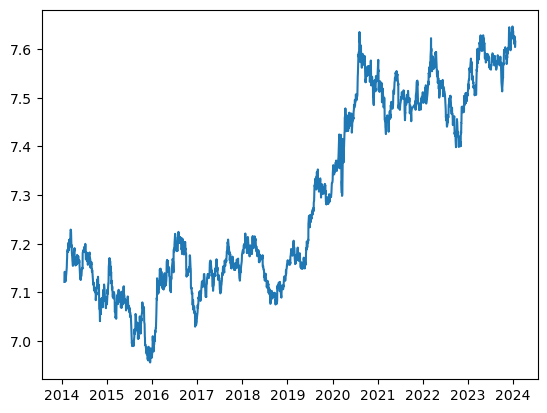

In [24]:
ts_log = np.log(ts)
plt.plot(ts_log)

C:\Users\ushah\AppData\Local\Temp\ipykernel_15516\823555687.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(212)
C:\Users\ushah\AppData\Local\Temp\ipykernel_15516\823555687.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


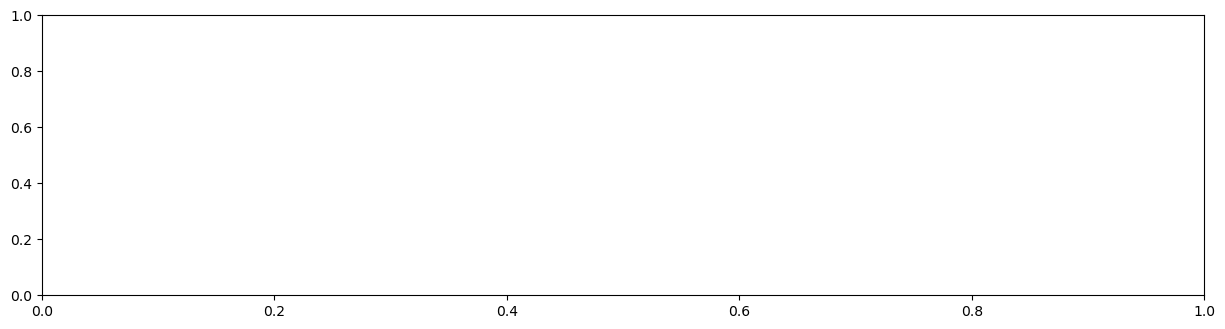

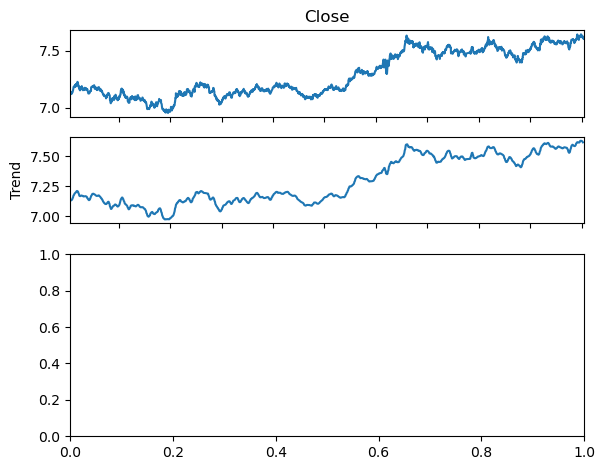

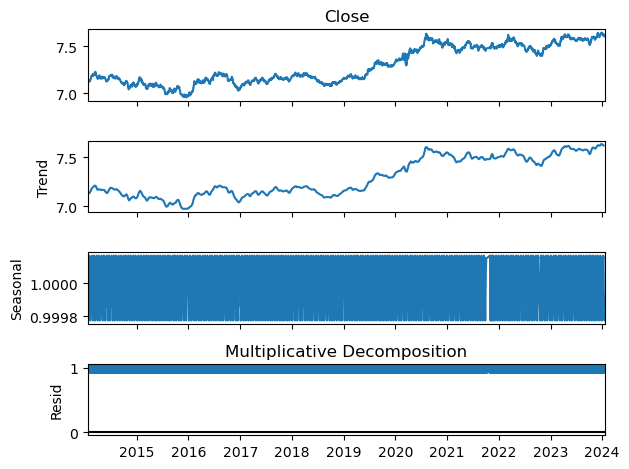

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

additive = seasonal_decompose(ts_log, model='additive', period=12)

multiplicative = seasonal_decompose(ts_log, model='multiplicative', period=12)

plt.figure(figsize=(15,8))
plt.subplot(211)
additive.plot()
plt.title('Additive Decomposition')
plt.subplot(212)
multiplicative.plot()
plt.title('Multiplicative Decomposition')
plt.tight_layout()
plt.show()




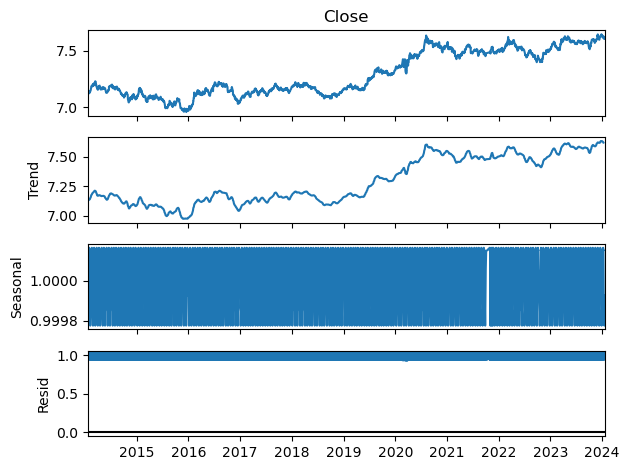

In [37]:

result = seasonal_decompose(ts_log, model='multiplicative', period=12)
result.plot()
plt.show()

In [41]:
print('Variance of additive seasonal component:', additive.seasonal.var())
print('Variance of multiplicative seasonal component:', multiplicative.seasonal.var())

print('Variance of additive residual component:', additive.resid.var())
print('Variance of multiplicative residual component:', multiplicative.resid.var())


Variance of additive seasonal component: 9.366623663840394e-07
Variance of multiplicative seasonal component: 1.7112177563011e-08
Variance of additive residual component: 8.378315509937964e-05
Variance of multiplicative residual component: 1.5639983403225496e-06


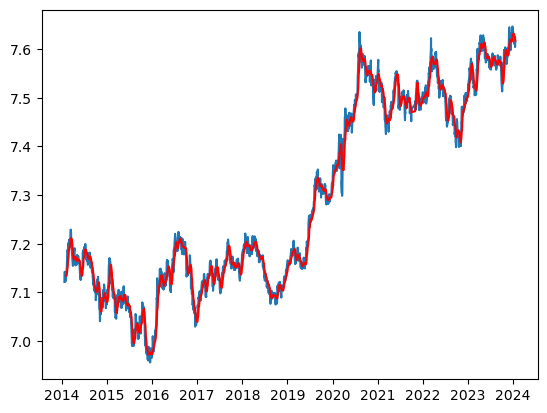

In [42]:
moving_avg = ts_log.rolling(window=12).mean()

plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [43]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2014-01-22         NaN
2014-01-23         NaN
2014-01-24         NaN
2014-01-27         NaN
2014-01-28         NaN
2014-01-29         NaN
2014-01-30         NaN
2014-01-31         NaN
2014-02-03         NaN
2014-02-04         NaN
2014-02-05         NaN
2014-02-06    0.002488
Name: Close, dtype: float64

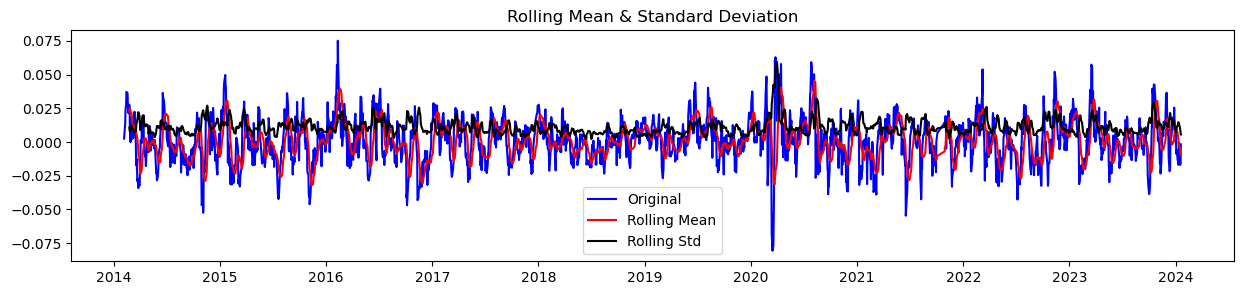

Results of Dickey-Fuller Test:
Test Statistic                -1.248061e+01
p-value                        3.097544e-23
#Lags Used                     1.400000e+01
Number of Observations Used    2.485000e+03
Critical Value (1%)           -3.432984e+00
Critical Value (5%)           -2.862704e+00
Critical Value (10%)          -2.567390e+00
dtype: float64


In [44]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [47]:
len(ts_log_moving_avg_diff)

2500

In [108]:
df1=pd.DataFrame()
df1=df.copy()
df1=df1.iloc[11:, :]
df1.shape

(2500, 5)

In [109]:

df1['l_Close']=np.log(df1['Close'])
df1['l_Open']=np.log(df1['Open'])
df1['l_High']=np.log(df1['High'])
df1['l_Low']=np.log(df1['Low'])
df1['l_Volume']=np.log(df1['Volume'])
df1.head()

,Close,Volume,Open,High,Low,l_Close,l_Open,l_High,l_Low,l_Volume
Date,,,,,,,,,,
2014-02-06,1257.2,84600.0,1257.7,1267.5,1252.5,7.136642,7.137040,7.144802,7.132897,11.345690
2014-02-07,1262.9,128223.0,1256.9,1272.0,1255.5,7.141166,7.136404,7.148346,7.135289,11.761526
2014-02-10,1274.7,90391.0,1265.4,1277.8,1264.7,7.150466,7.143144,7.152895,7.142590,11.411900
2014-02-11,1289.8,146167.0,1274.2,1294.4,1273.5,7.162242,7.150074,7.165803,7.149524,11.892505
2014-02-12,1295.0,104754.0,1290.1,1296.4,1283.9,7.166266,7.162475,7.167346,7.157658,11.559370


In [110]:
df1.drop(['Close','Volume','Open','High','Low'],axis=1,inplace=True)
df1.head()

,l_Close,l_Open,l_High,l_Low,l_Volume
Date,,,,,
2014-02-06,7.136642,7.137040,7.144802,7.132897,11.345690
2014-02-07,7.141166,7.136404,7.148346,7.135289,11.761526
2014-02-10,7.150466,7.143144,7.152895,7.142590,11.411900
2014-02-11,7.162242,7.150074,7.165803,7.149524,11.892505
2014-02-12,7.166266,7.162475,7.167346,7.157658,11.559370


In [111]:
df1.isnull().sum()

l_Close     0
l_Open      0
l_High      0
l_Low       0
l_Volume    0
dtype: int64

In [113]:
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [114]:
train_set.shape

(2000, 5)

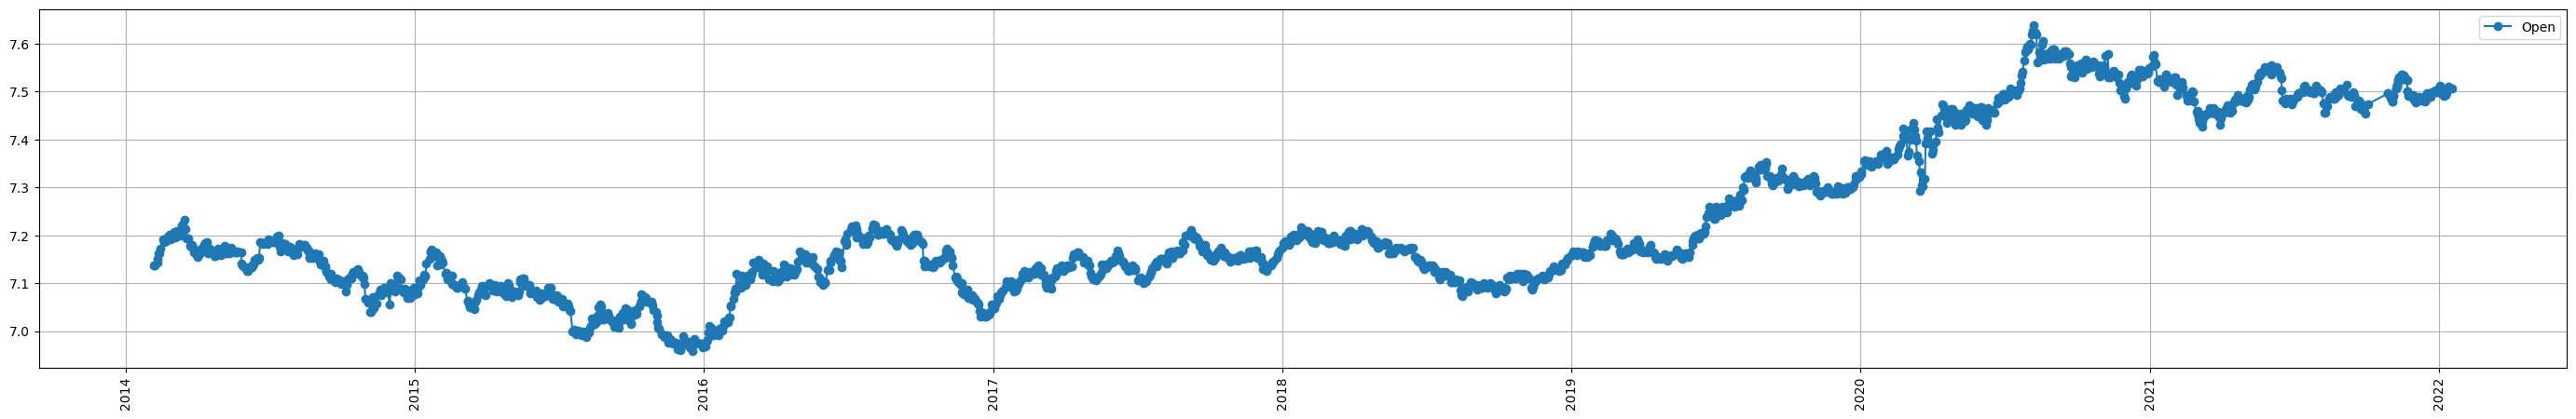

In [115]:
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(train_set['l_Open'], marker='o', label='Open')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [116]:
ts_decomposition = seasonal_decompose(x=train_set['l_Close'], model='multiplicative', period=6)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

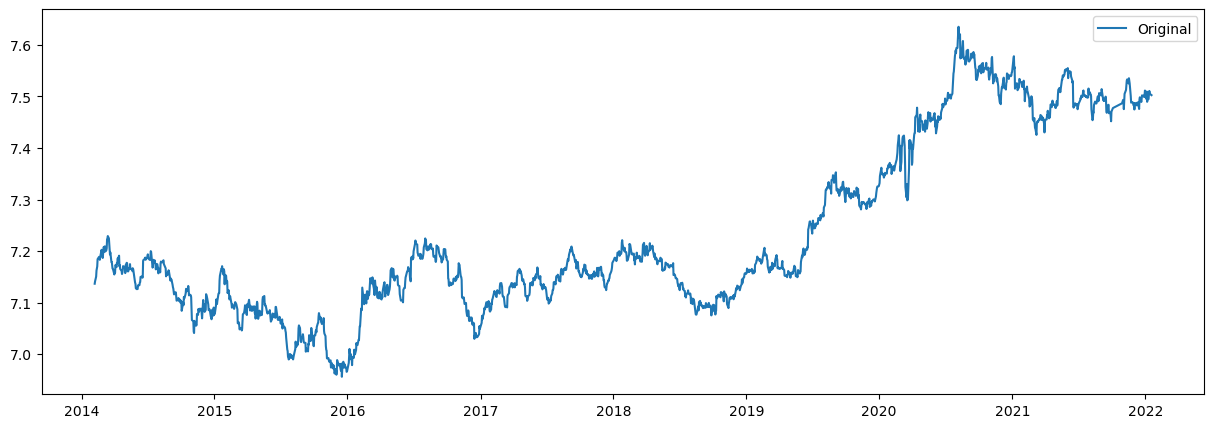

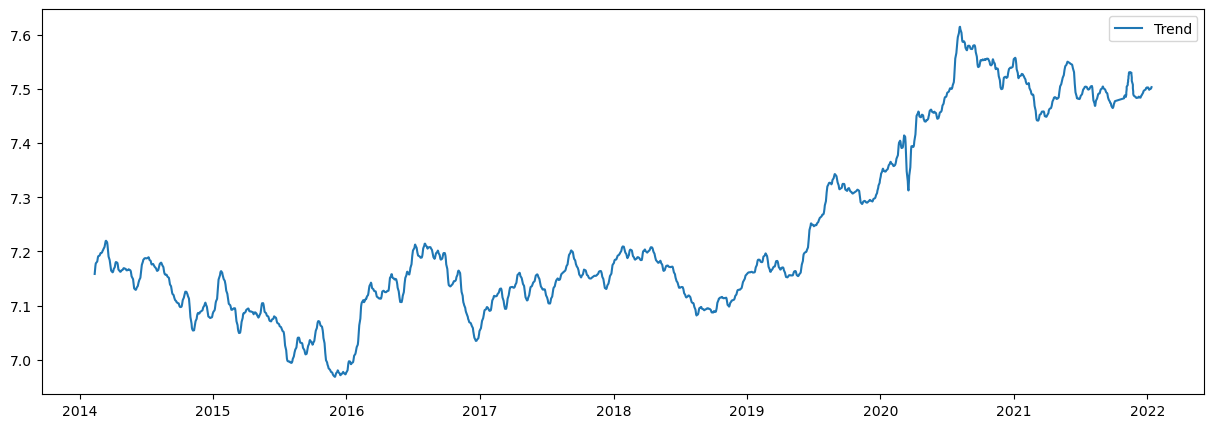

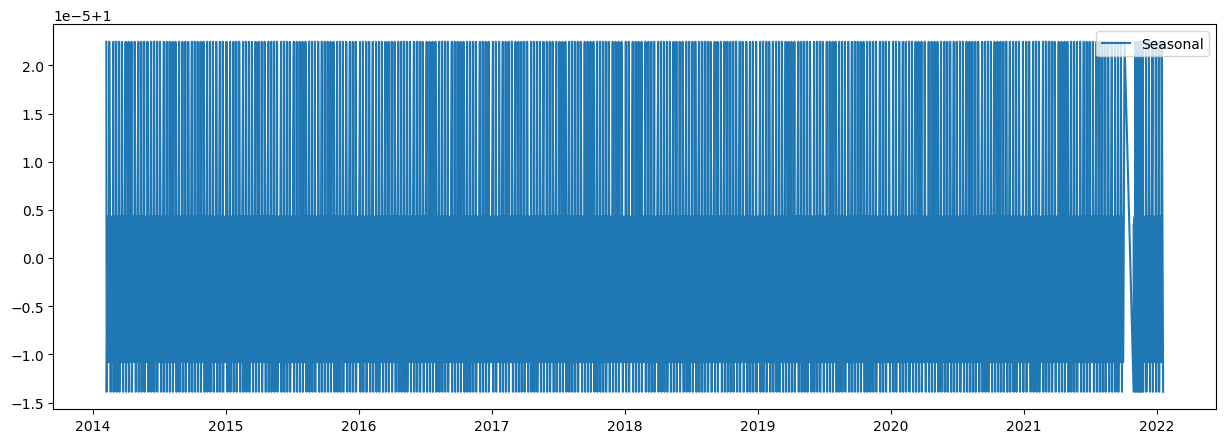

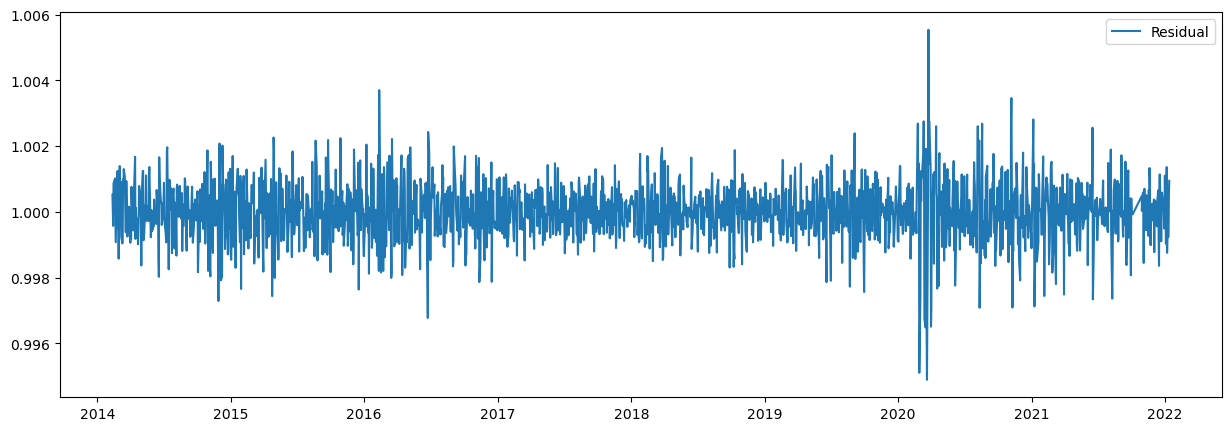

In [117]:
plt.figure(figsize=(15,5))
plt.plot(train_set['l_Close'], label='Original')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(trend_estimate, label='Trend')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(seasonal_estimate, label='Seasonal')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(residual_estimate, label='Residual')
plt.legend()

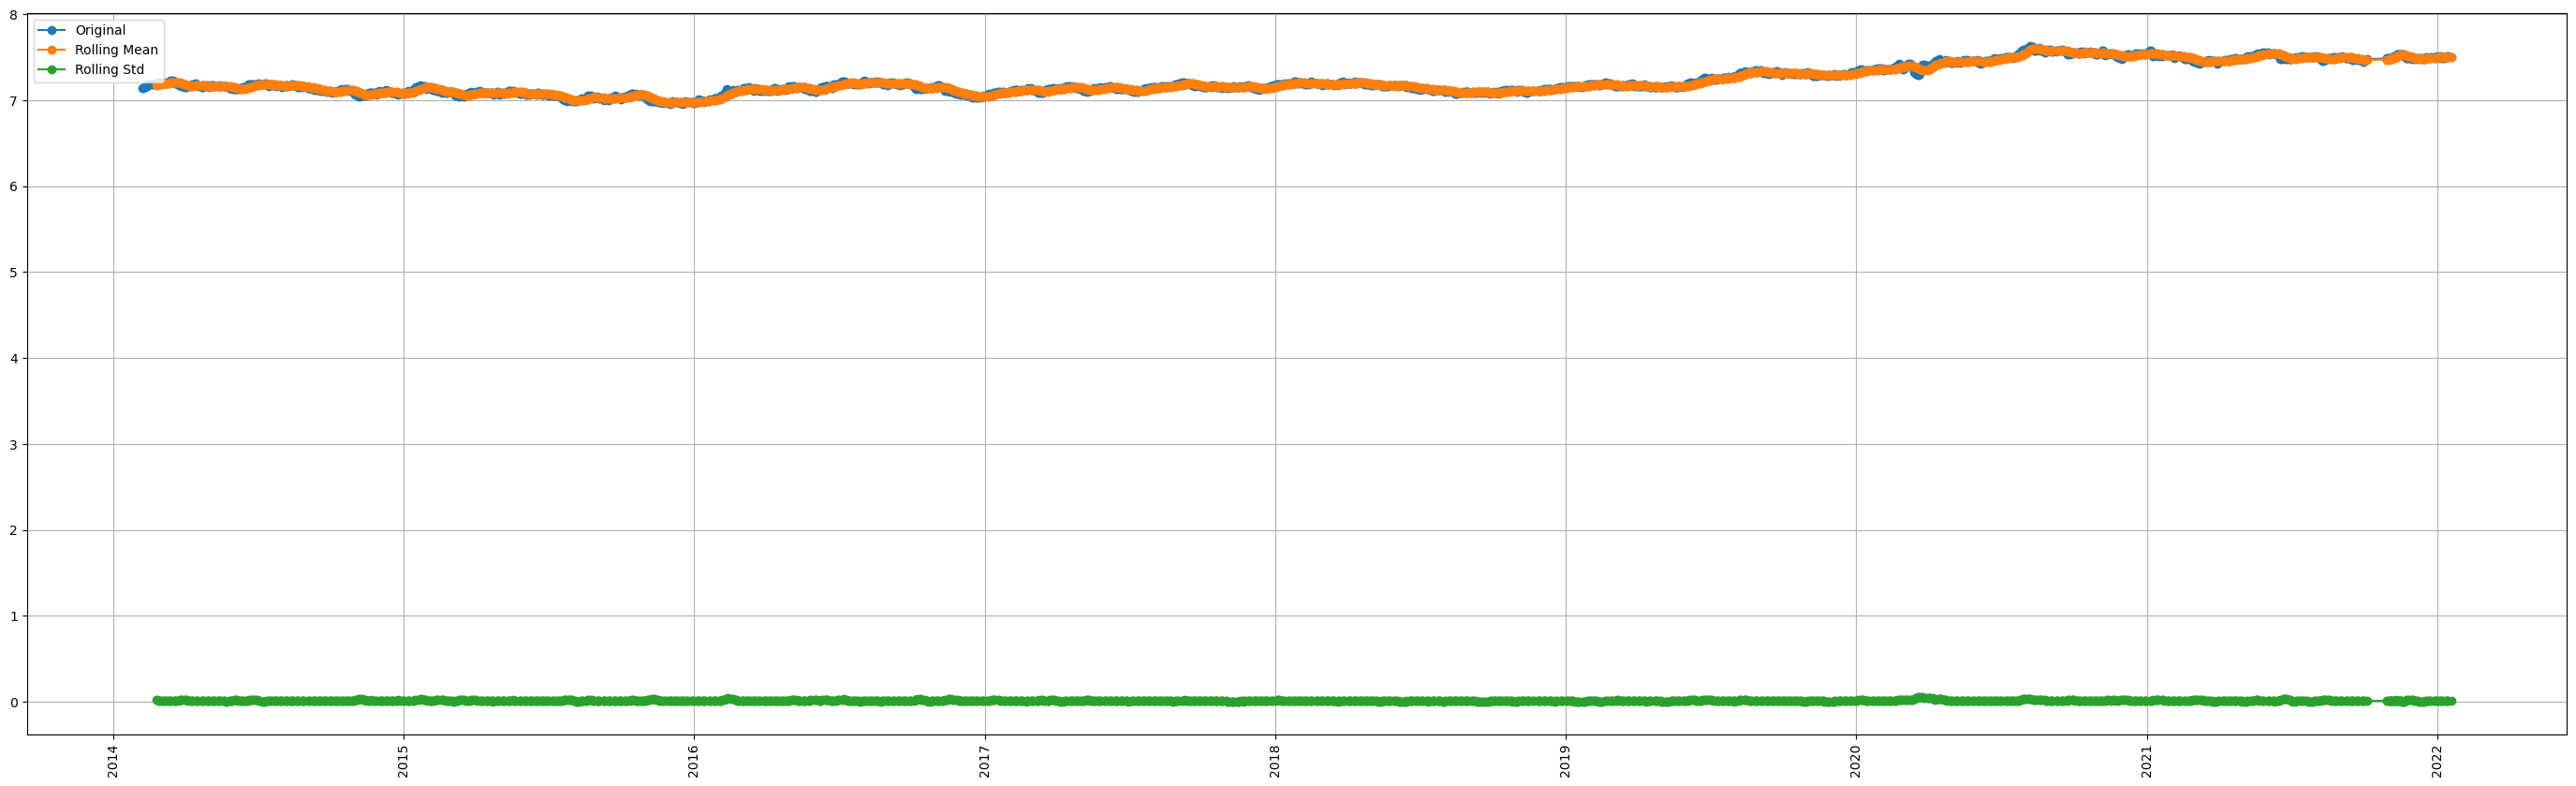

In [118]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(train_set['l_Close'], marker='o', label='Original')
plt.plot(train_set['l_Close'].rolling(window=12).mean(), marker='o', label='Rolling Mean')
plt.plot(train_set['l_Close'].rolling(window=12).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [119]:
df1 = df1.reset_index().rename(columns={"index":"date"})
df1.head()

,Date,l_Close,l_Open,l_High,l_Low,l_Volume
0,2014-02-06,7.136642,7.137040,7.144802,7.132897,11.345690
1,2014-02-07,7.141166,7.136404,7.148346,7.135289,11.761526
2,2014-02-10,7.150466,7.143144,7.152895,7.142590,11.411900
3,2014-02-11,7.162242,7.150074,7.165803,7.149524,11.892505
4,2014-02-12,7.166266,7.162475,7.167346,7.157658,11.559370


In [128]:
import numpy as np
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42, shuffle=False)

In [129]:
df1.head()

,Date,l_Close,l_Open,l_High,l_Low,l_Volume
0,2014-02-06,7.136642,7.137040,7.144802,7.132897,11.345690
1,2014-02-07,7.141166,7.136404,7.148346,7.135289,11.761526
2,2014-02-10,7.150466,7.143144,7.152895,7.142590,11.411900
3,2014-02-11,7.162242,7.150074,7.165803,7.149524,11.892505
4,2014-02-12,7.166266,7.162475,7.167346,7.157658,11.559370


In [130]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [131]:
for name, column in train_set.drop(columns='Date').items():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "l_Close" 
    -----------------------------------------------
ADF Statistic: -0.604883
p-value: 0.869875
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Non-stationary


    Augmented Dickey-Fuller Test on "l_Open" 
    -----------------------------------------------
ADF Statistic: -0.566661
p-value: 0.878339
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Non-stationary


    Augmented Dickey-Fuller Test on "l_High" 
    -----------------------------------------------
ADF Statistic: -0.348528
p-value: 0.918345
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Non-stationary


    Augmented Dickey-Fuller Test on "l_Low" 
    -----------------------------------------------
ADF Statistic: -0.631830
p-value: 0.863626
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Non-stationary


    Augmented Dickey-Fuller Test on "l_Volume" 
    -----------------------------------------------
ADF Statistic: -3.974215
p-value: 0.001552
Critical 

In [132]:
# ADF Test on each column
for name, column in train_set.drop(columns='Date').diff().dropna().items():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "l_Close" 
    -----------------------------------------------
ADF Statistic: -21.318866
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Stationary


    Augmented Dickey-Fuller Test on "l_Open" 
    -----------------------------------------------
ADF Statistic: -21.627979
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Stationary


    Augmented Dickey-Fuller Test on "l_High" 
    -----------------------------------------------
ADF Statistic: -9.926145
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Stationary


    Augmented Dickey-Fuller Test on "l_Low" 
    -----------------------------------------------
ADF Statistic: -23.304948
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Stationary


    Augmented Dickey-Fuller Test on "l_Volume" 
    -----------------------------------------------
ADF Statistic: -14.636371
p-value: 0.000000
Critical Values:
	1%:

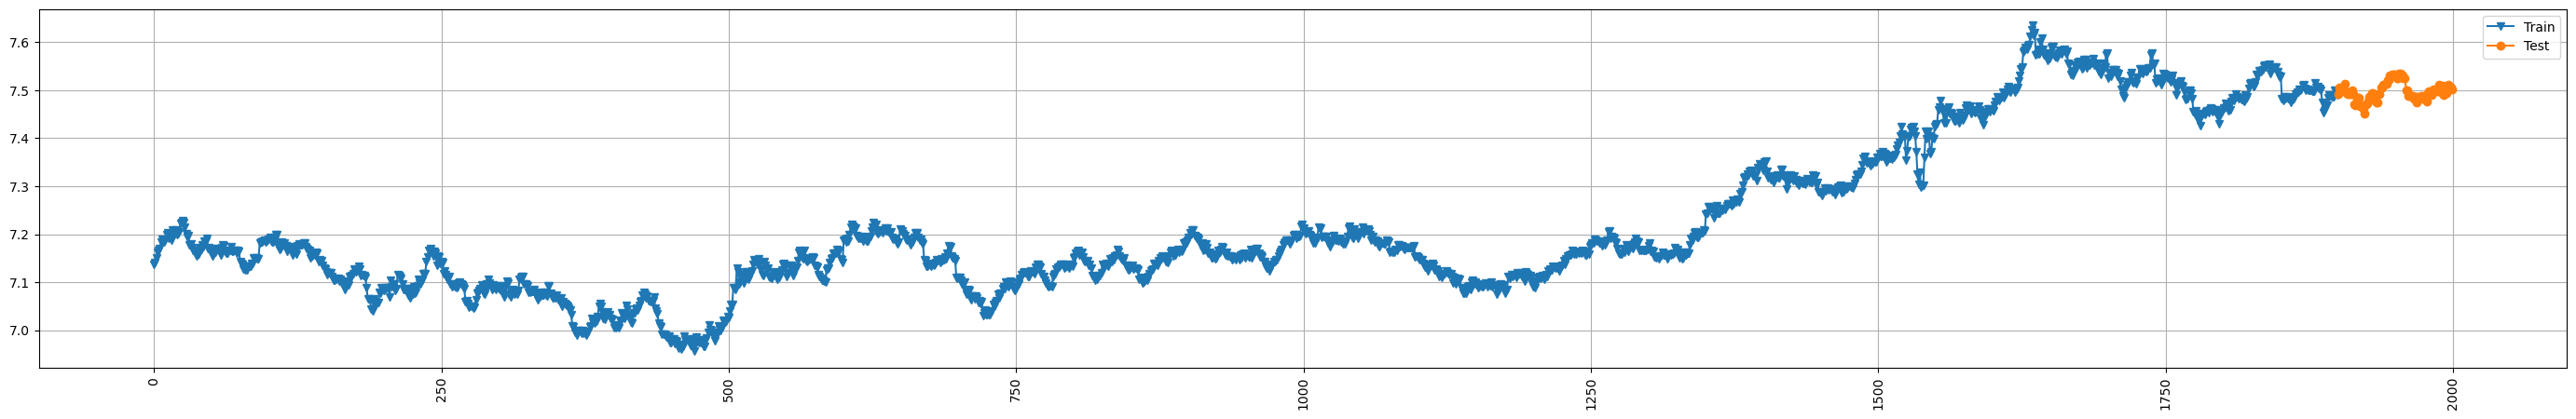

In [133]:
train=train_set[:-100]
test=train_set[-100:]

plt.figure(figsize=(35,5))
plt.grid()
plt.plot(train['l_Close'], marker='v', label='Train')
plt.plot( test['l_Close'], marker='o', label='Test')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=-15083.831, Time=9.76 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=-12657.863, Time=1.16 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=-13715.673, Time=3.06 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=inf, Time=5.20 sec
 ARIMA(2,2,2)(0,0,1)[4]             : AIC=-15140.266, Time=9.68 sec
 ARIMA(2,2,2)(0,0,0)[4]             : AIC=-15039.498, Time=4.54 sec
 ARIMA(2,2,2)(0,0,2)[4]             : AIC=-14993.124, Time=7.29 sec
 ARIMA(2,2,2)(1,0,0)[4]             : AIC=-15164.094, Time=11.37 sec
 ARIMA(2,2,2)(2,0,0)[4]             : AIC=-15051.133, Time=6.40 sec
 ARIMA(2,2,2)(2,0,1)[4]             : AIC=-15033.821, Time=7.38 sec
 ARIMA(1,2,2)(1,0,0)[4]             : AIC=-15396.133, Time=10.14 sec
 ARIMA(1,2,2)(0,0,0)[4]             : AIC=-14810.635, Time=1.39 sec
 ARIMA(1,2,2)(2,0,0)[4]             : AIC=-14807.165, Time=3.02 sec
 ARIMA(1,2,2)(1,0,1)[4]             : AIC=-15354.046, Time=12.41 sec
 ARIMA(1,

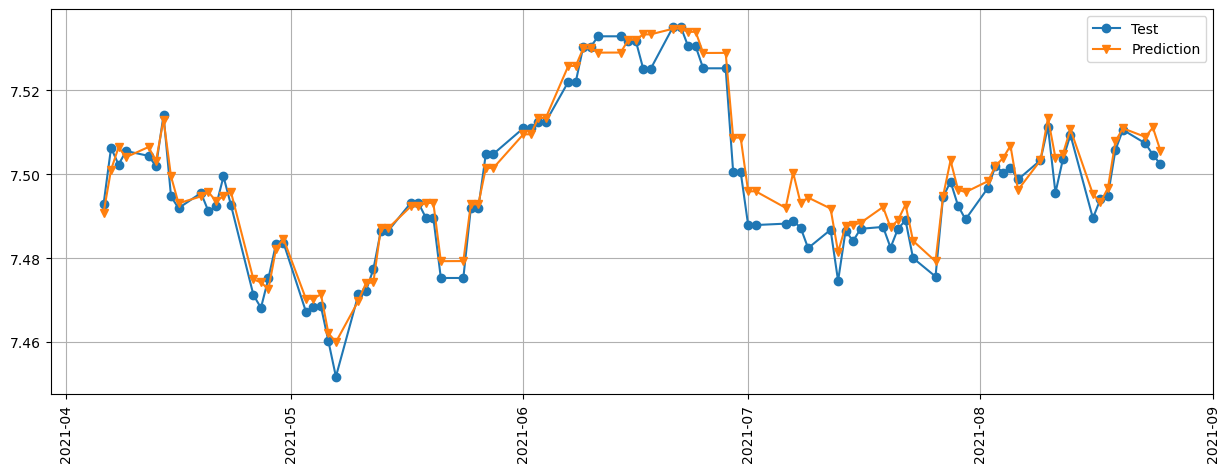

Mean Absolute Percentage Error 0.00043599972705947736
Mean Squared Error 1.7175462032491026e-05
RMSE 0.00414432890013462
AIC values -15643.58317223706


,Test,Prediction,Difference,% Chnage
0,7.492872,7.490818,0.002054,0.027407
1,7.506317,7.501085,0.005232,0.069705
2,7.502297,7.506440,-0.004144,0.055230
3,7.505547,7.504086,0.001461,0.019467
4,7.504392,7.506501,-0.002109,0.028105
...,...,...,...,...
95,7.505767,7.507856,-0.002089,0.027828
96,7.510595,7.510956,-0.000361,0.004812
97,7.507361,7.508904,-0.001544,0.020562
98,7.504667,7.511154,-0.006487,0.086437


In [134]:

arima = pm.auto_arima(train['l_Close'],X=train.drop(columns=['Date','l_Close']), d=2,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=False,test='adf')

print(arima.summary())
print(arima.params)



pred=arima.predict(n_periods=100, X=test.drop(columns=['Date','l_Close']), alpha=0.05)
pred

plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(train['Date'][-100:],test['l_Close'], marker='o', label='Test')
plt.plot(train['Date'][-100:],pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_percentage_error(test['l_Close'], pred)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test['l_Close'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)
print("="*50)
print("="*50)
print("="*50)


a=pd.DataFrame(test['l_Close'])
a=a.reset_index()
a=a.drop(columns='index')
a

prediction=pd.DataFrame(pred)
prediction=prediction.reset_index()
prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['Test']=a['l_Close']
output['Prediction']=prediction[0]
output['Difference']=output['Test']-output['Prediction']
output['% Chnage']=abs(output['Difference']/output['Test'])*100
output

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=-15652.120, Time=6.92 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=-14638.240, Time=0.41 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=-15167.065, Time=2.96 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=-15634.223, Time=3.49 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=-14640.132, Time=1.49 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=-15653.513, Time=7.40 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=-15752.193, Time=9.47 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=-15653.811, Time=7.83 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=-15718.548, Time=4.45 sec
 ARIMA(2,1,1)(0,0,0)[4] intercept   : AIC=-15618.187, Time=7.47 sec
 ARIMA(3,1,2)(0,0,0)[4] intercept   : AIC=-15638.232, Time=5.48 sec
 ARIMA(2,1,3)(0,0,0)[4] intercept   : AIC=-15759.387, Time=5.53 sec
 ARIMA(2,1,3)(1,0,0)[4] intercept   : AIC=-15721.837, Time=8.26 sec
 ARIMA(2,1,3)(0,0,1)[4] intercept   : AIC=-15611.622, Time=5.33 sec
 ARIM

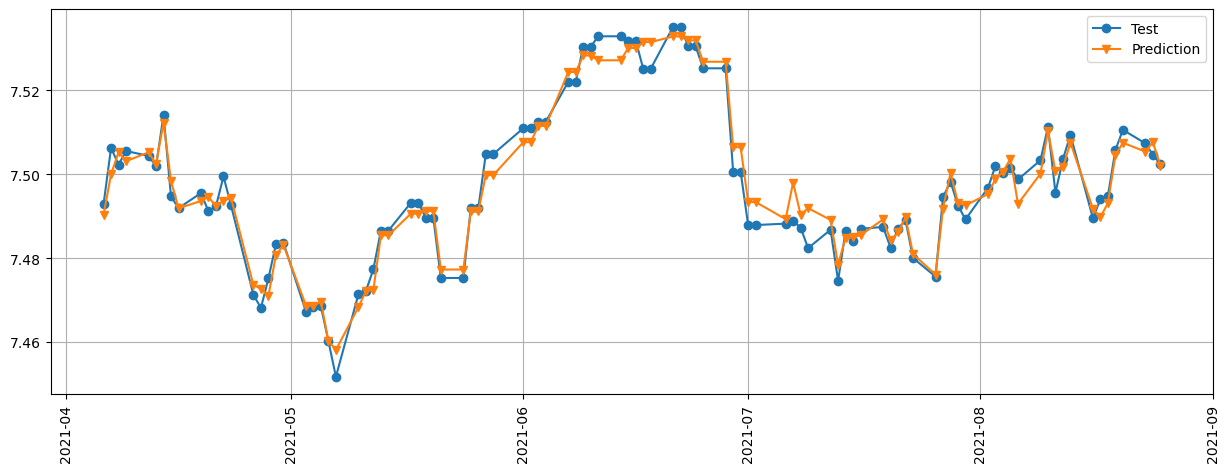

Mean Absolute Percentage Error 0.0003508442974115101
Mean Squared Error 1.0766818151707681e-05
RMSE 0.0032812830039037596
AIC values -15801.025903705588


,Test,Prediction,Difference,% Chnage
0,7.492872,7.490342,0.002529,0.033756
1,7.506317,7.499999,0.006318,0.084173
2,7.502297,7.505289,-0.002992,0.039883
3,7.505547,7.503134,0.002413,0.032148
4,7.504392,7.505223,-0.000832,0.011082
...,...,...,...,...
95,7.505767,7.504568,0.001199,0.015981
96,7.510595,7.507518,0.003077,0.040966
97,7.507361,7.505401,0.001960,0.026106
98,7.504667,7.507672,-0.003006,0.040049


In [135]:
arima = pm.auto_arima(train['l_Close'],X=train.drop(columns=['Date','l_Close']), d=1,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=False,test='adf')

print(arima.summary())
print(arima.params)



pred=arima.predict(n_periods=100, X=test.drop(columns=['Date','l_Close']), alpha=0.05)
pred

plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(train['Date'][-100:],test['l_Close'], marker='o', label='Test')
plt.plot(train['Date'][-100:],pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_percentage_error(test['l_Close'], pred)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test['l_Close'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)
print("="*50)
print("="*50)
print("="*50)


a=pd.DataFrame(test['l_Close'])
a=a.reset_index()
a=a.drop(columns='index')
a

prediction=pd.DataFrame(pred)
prediction=prediction.reset_index()
prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['Test']=a['l_Close']
output['Prediction']=prediction[0]
output['Difference']=output['Test']-output['Prediction']
output['% Chnage']=abs(output['Difference']/output['Test'])*100
output
